In [1]:
from transformers import ViTFeatureExtractor, ViTForImageClassification


/Users/rob.bajra/Projects/vit-base-transfer-learning/.env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
from transformers import ViTFeatureExtractor, ViTForImageClassification, AutoFeatureExtractor, AutoModelForImageClassification
from PIL import Image
import requests

url = 'https://upload.wikimedia.org/wikipedia/commons/1/15/Highlander-7.jpg'


image = Image.open(requests.get(url, stream=True).raw)

# feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
feature_extractor = AutoFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = AutoModelForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: Egyptian cat


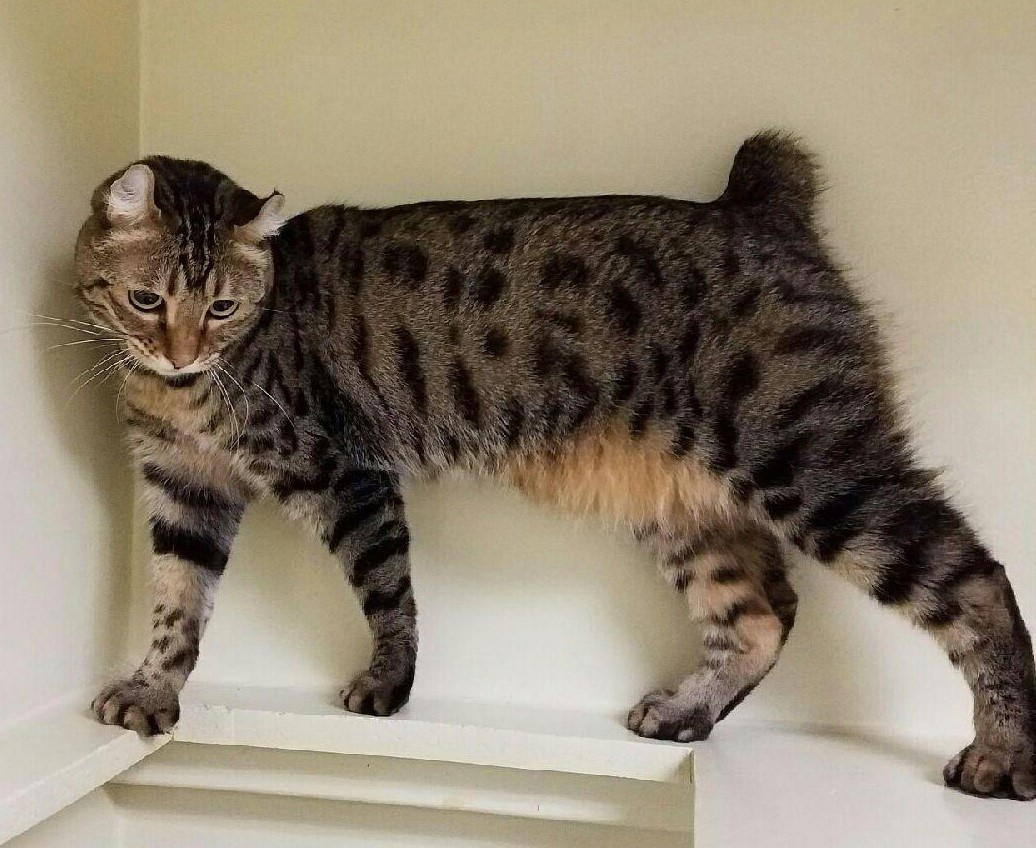

In [11]:
image